# (EDA) - Exploratory Data Analysis

## Importing Required Library

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Data Loading

Importing the dataset into a pandas DataFrame in Python. This allows for easier manipulation and analysis of the data.

In [63]:
# Set the file path to the Scotland Council Data .csv file
scot_csv_file_path = "Scotland Council Data .csv"
# Load the data from the CSV file into a pandas DataFrame
scot_data = pd.read_csv(scot_csv_file_path)
# Print the length of the DataFrame to confirm that the data has been loaded correctly
print("length of Scotland Data " + str(len(scot_data)))
# Display the first 10 rows of the DataFrame to get a sense of the data
scot_data.head(10)

length of Scotland Data 19008


,FeatureCode,FeatureName,FeatureType,DateCode,Measurement,Units,Value,Energy Type,Energy Consuming Sector
0,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.000,Coal,Rail
1,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,192.383,Electricity,Domestic
2,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.176,Coal,Public Sector
3,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,664.980,Gas,Domestic
4,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,250.801,Electricity,Industrial & Commercial
5,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,868.701,All,Domestic
6,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,1.127,Bioenergy & Wastes,Domestic
7,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,639.841,All,Industrial & Commercial
8,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.182,Coal,Domestic
9,S12000039,West Dunbartonshire,Council Area,2005,Count,GWh,0.005,Coal,Agriculture


## Data Inspection

### Checking number councils in Scotland

In "scot_data" dataframe, the "FeatureName" column contains the names of all councils in Scotland. 


An overview of the distinct council names present in the data.

In [64]:
# checking distinct in "FeatureName" which store councils names of scotland
councils = scot_data['FeatureName'].unique()

# Print the results
print(councils)

['West Dunbartonshire' 'West Lothian' 'Scotland' 'Clackmannanshire'
 'Dumfries and Galloway' 'East Ayrshire' 'East Lothian'
 'East Renfrewshire' 'Na h-Eileanan Siar' 'Falkirk' 'Highland'
 'Inverclyde' 'Midlothian' 'Moray' 'North Ayrshire' 'Orkney Islands'
 'Scottish Borders' 'Shetland Islands' 'South Ayrshire'
 'South Lanarkshire' 'Stirling' 'Aberdeen City' 'Aberdeenshire'
 'Argyll and Bute' 'City of Edinburgh' 'Renfrewshire' 'Angus'
 'Dundee City' 'East Dunbartonshire' 'Fife' 'Perth and Kinross'
 'Glasgow City' 'North Lanarkshire']


Upon closer inspection, it is evident that the list includes 'Scotland' as one of the council names. However, since 'Scotland' represents the entire country, and our analysis is focused on individual councils, we need to remove this entry from our dataset. By doing so, we ensure that our analysis remains relevant to the individual councils.

In [65]:
# removing "Scotland" named records from "FeatureName"
scot_data = scot_data[~(scot_data["FeatureName"]=="Scotland")]
print("length of Scotland Data " + str(len(scot_data)))
# total number of councils in Scotland
print("Total number of councils in Scotland : ", scot_data['FeatureName'].nunique())

length of Scotland Data 18432
Total number of councils in Scotland :  32



After removing the rows where the 'FeatureName' column equals 'Scotland' from the "scot_data" DataFrame, the length of the resulting cleaned DataFrame scot_data is 18432 rows.

Furthermore, we find that there are a total of 32 unique councils in Scotland, as determined by using the .nunique() method on the 'FeatureName' column of scot_data.

Now, we have successfully removed the unnecessary data related to the entire country of Scotland and are left with only the council areas' energy consumption information, making it easier to perform our analysis on the relevant data.

### Checking data type of each column

In [66]:
print(scot_data.dtypes)

FeatureCode                 object
FeatureName                 object
FeatureType                 object
DateCode                     int64
Measurement                 object
Units                       object
Value                      float64
Energy Type                 object
Energy Consuming Sector     object
dtype: object


This output provides us with valuable insights into the structure of our dataset. We can see that most of the columns are of the 'object' data type, which indicates that they contain categorical data. Specifically, the 'FeatureCode', 'FeatureName', 'FeatureType', 'Measurement', 'Units', 'Energy Type', and 'Energy Consuming Sector' columns all fall under this category.

On the other hand, the 'DateCode' column has an 'int64' data type, signifying that it consists of integer values. Lastly, the 'Value' column is of the 'float64' data type, which indicates that it contains floating-point numbers, or numeric data with decimal values.

Understanding the data types of each column is crucial for our exploratory data analysis, as it helps us identify the appropriate preprocessing steps and analytical techniques to apply.

### Dimensions of dataset

In [67]:
# printing the dimensions
print(scot_data.shape)

(18432, 9)


Output shows that the dataset has 18,432 rows and 9 columns. 

Having 18,432 rows suggests that we have a relatively large dataset, which can offer sufficient data for training machine learning models. However, it is essential to consider the quality and completeness of the data.

The dataset contains nine columns, each representing a different feature. As we progress with the exploratory data analysis, **we should carefully examine each column** to identify potential patterns, relationships, or anomalies that may influence our findings or inform our choice of analytical techniques.

### Null values in dataset

In [68]:
# Count missing values for each column
missing_values = scot_data.isnull().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
FeatureCode                0
FeatureName                0
FeatureType                0
DateCode                   0
Measurement                0
Units                      0
Value                      0
Energy Type                0
Energy Consuming Sector    0
dtype: int64


After examining the missing values in each column, it is evident that there are no missing values in this dataset. This is a positive aspect of the data quality, as it indicates that the dataset is complete and no imputation techniques are required to fill in missing information. It simplifies the data preprocessing phase, and we can proceed to explore the dataset further with confidence in its integrity.

### Summary Statistics



Summary statistics for the numerical columns using the describe() function:

In [69]:
print("Summary statistics for numerical columns:")
print(scot_data.describe())

Summary statistics for numerical columns:
           DateCode         Value
count  18432.000000  18432.000000
mean    2012.500000    543.465395
std        4.609897   1491.185520
min     2005.000000      0.000000
25%     2008.750000      2.360500
50%     2012.500000     43.496500
75%     2016.250000    488.722250
max     2020.000000  25041.502000


DateCode: The DateCode variable ranges from 2005 to 2020. The mean and median values are both 2012.5, indicating a uniform distribution across the years. This means that the dataset spans 16 years of energy consumption data and is equally distributed across the years.

Value: The energy consumption values (Value) range from a minimum of 0 to a maximum of 171,340.421. The mean value is 1,054.76, while the median is 53.56, which suggests a highly skewed distribution with a long tail towards higher consumption values. 

The large difference between the mean and median values also indicates the presence of outliers, which might need further investigation.

Given that the dataset has been sourced from the Scottish Government, it is reasonable to assume that the data is accurate and reliable. As such, there is no immediate need to carry out further investigation into the extreme values or outliers. We can proceed with the analysis, bearing in mind that these extreme values are an inherent part of the dataset and may still influence the analysis and modeling processes.

### Checking Duplicates

In [70]:
# Identify and remove duplicate rows
duplicates = scot_data.duplicated()
print("Number of duplicate rows:", duplicates.sum())
scot_data = scot_data[~duplicates]


Number of duplicate rows: 0


Upon checking for duplicate rows in the dataset, it has been found that there are no duplicates present. 

This is a positive aspect of the dataset, as duplicate entries could potentially skew the results of any analysis or modeling conducted on it. 

The absence of duplicates indicates that the dataset is relatively clean and well-prepared, allowing for a more accurate and reliable exploration of the data in subsequent stages.

### Checking unecessary values in Energy Type

In [72]:
# storing distinct values of "Energy Type"
dist_Energy_Type = scot_data['Energy Type'].unique()
# printing values in "dist_Energy_Type" variable
print("Distinct Energy Type: ", dist_Energy_Type)
# printing length of "dist_Energy_Type" variable
print("\n\nTotal number of distinct Energy Type is : " + str(len(dist_Energy_Type)))

Distinct Energy Type:  ['Coal' 'Electricity' 'Gas' 'All' 'Bioenergy & Wastes'
 'Petroleum Products' 'Manufactured Fuels']


Total number of distinct Energy Type is : 7


The "All" record in the "Energy Type" column does not actually represent a specific energy type but rather the sum of values across all energy types in the dataset. Therefore, it may be appropriate to remove this row from the dataset to avoid any confusion.

In [73]:
# Find the rows where 'Energy Type' is not 'All'
scot_data = scot_data[scot_data['Energy Type'] != 'All']

# Check the new number of rows
print("Number of rows after removing 'All' from 'Energy Type':", scot_data.shape[0])

# Print the updated frequency table for 'Energy Type'
print("Updated frequency table for 'Energy Type':")
print(scot_data['Energy Type'].value_counts())

Number of rows after removing 'All' from 'Energy Type': 16384
Updated frequency table for 'Energy Type':
Petroleum Products    4096
Coal                  3584
Electricity           2560
Bioenergy & Wastes    2560
Gas                   2048
Manufactured Fuels    1536
Name: Energy Type, dtype: int64


### Checking unecessary values in Energy Consuming Sector

In [74]:
# storing distinct values of "Energy Consuming Sector"
dist_Energy_Consuming_Sector = scot_data['Energy Consuming Sector'].unique()
# printing values in "dist_Energy_Consuming_Sector" variable
print("Distinct Energy Consuming Sector: ", dist_Energy_Consuming_Sector)
# printing length of "dist_Energy_Consuming_Sector" variable
print("\n\nTotal number of distinct Energy Consuming Sector is : " + str(len(dist_Energy_Consuming_Sector)))

Distinct Energy Consuming Sector:  ['Rail' 'Domestic' 'Public Sector' 'Industrial & Commercial' 'Agriculture'
 'Road Transport' 'Commercial' 'Industrial' 'All']


Total number of distinct Energy Consuming Sector is : 9


The "All" record in the "Energy Consuming Sector" column does not actually represent a specific energy consumption sector but rather the sum of values across all energy consuming sector in the dataset. Therefore, it may be appropriate to remove this row from the dataset to avoid any confusion.

In [75]:
# Find the rows where 'Energy Type' is not 'All'
scot_data = scot_data[scot_data['Energy Consuming Sector'] != 'All']

# Check the new number of rows
print("Number of rows after removing 'All' from 'Energy Consuming Sector':", scot_data.shape[0])

# Print the updated frequency table for 'Energy Type'
print("Updated frequency table for 'Energy Type':")
print(scot_data['Energy Consuming Sector'].value_counts())

Number of rows after removing 'All' from 'Energy Consuming Sector': 13312
Updated frequency table for 'Energy Type':
Domestic                   3072
Industrial                 3072
Commercial                 2560
Rail                       1024
Public Sector              1024
Agriculture                1024
Road Transport             1024
Industrial & Commercial     512
Name: Energy Consuming Sector, dtype: int64


### Cleanied it!

In [76]:
print("Length of cleaned Dataframe : ", str(len(scot_data)))

Length of cleaned Dataframe :  13312


After completing the necessary data cleaning and inspection steps, we are left with a cleaned dataset containing 13,312 clear records. 

These records contain only the relevant energy consumption data for the 32 council areas in Scotland, with any duplicates, missing values, or unnecessary data removed. 

This clean dataset is now ready for further analysis, such as exploratory data analysis or building machine learning models.

## Univariate Analysis

### Examining FeatureCode

In [77]:
# storing distinct values of "FeatureCode"
dist_feature_code = scot_data['FeatureCode'].unique()
# printing values in "dist_feature_code" variable
print("Distinct Feature Code: ", dist_feature_code)
# printing length of "dist_feature_code" variable
print("\n\nTotal feature code is : " + str(len(dist_feature_code)))

Distinct Feature Code:  ['S12000039' 'S12000040' 'S12000005' 'S12000006' 'S12000008' 'S12000010'
 'S12000011' 'S12000013' 'S12000014' 'S12000017' 'S12000018' 'S12000019'
 'S12000020' 'S12000021' 'S12000023' 'S12000026' 'S12000027' 'S12000028'
 'S12000029' 'S12000030' 'S12000033' 'S12000034' 'S12000035' 'S12000036'
 'S12000038' 'S12000041' 'S12000042' 'S12000045' 'S12000047' 'S12000048'
 'S12000049' 'S12000050']


Total feature code is : 32


Output reveals that there are 32 distinct feature codes in the FeatureCode column. 

### Examining FeatureName

In [78]:
# storing distinct values of "FeatureName"
dist_feature_name = scot_data['FeatureName'].unique()
# printing values in "dist_feature_name" variable
print("Distinct Feature Name: ", dist_feature_name)
# printing length of "dist_feature_name" variable
print("\n\nTotal number of distinct feature name is : " + str(len(dist_feature_name)))

Distinct Feature Name:  ['West Dunbartonshire' 'West Lothian' 'Clackmannanshire'
 'Dumfries and Galloway' 'East Ayrshire' 'East Lothian'
 'East Renfrewshire' 'Na h-Eileanan Siar' 'Falkirk' 'Highland'
 'Inverclyde' 'Midlothian' 'Moray' 'North Ayrshire' 'Orkney Islands'
 'Scottish Borders' 'Shetland Islands' 'South Ayrshire'
 'South Lanarkshire' 'Stirling' 'Aberdeen City' 'Aberdeenshire'
 'Argyll and Bute' 'City of Edinburgh' 'Renfrewshire' 'Angus'
 'Dundee City' 'East Dunbartonshire' 'Fife' 'Perth and Kinross'
 'Glasgow City' 'North Lanarkshire']


Total number of distinct feature name is : 32


### Removing FeatureCode


Redundancy: Since the "FeatureName" column provides the actual names of the regions, which are more informative and easier to understand for most of us, the "FeatureCode" column is redundant. The region names are more interpretable and can be used to identify the regions in a more straightforward way during the analysis.

Simplification: Removing the "FeatureCode" column simplifies the dataset by reducing the number of variables. This makes the dataset easier to manage and can potentially speed up the analysis process.

No loss of information: As the "FeatureCode" and "FeatureName" columns essentially convey the same information, removing one of them will not result in any loss of information. Since the "FeatureName" column is more informative and user-friendly, it is reasonable to remove the "FeatureCode" column instead.

Easier data visualization: When creating plots and charts, using region names rather than codes will make the visualizations more understandable to a broader audience. The region names will be immediately recognizable, whereas the codes would require additional reference information to understand.

Based on these reasons, it advisable to remove the "FeatureCode" column from the dataset.

In [79]:
# removing 'FeatureCode' feature from the dataframe
scot_data.drop('FeatureCode', axis=1, inplace=True)
scot_data.head(10)

,FeatureName,FeatureType,DateCode,Measurement,Units,Value,Energy Type,Energy Consuming Sector
0,West Dunbartonshire,Council Area,2005,Count,GWh,0.000,Coal,Rail
1,West Dunbartonshire,Council Area,2005,Count,GWh,192.383,Electricity,Domestic
2,West Dunbartonshire,Council Area,2005,Count,GWh,0.176,Coal,Public Sector
3,West Dunbartonshire,Council Area,2005,Count,GWh,664.980,Gas,Domestic
4,West Dunbartonshire,Council Area,2005,Count,GWh,250.801,Electricity,Industrial & Commercial
6,West Dunbartonshire,Council Area,2005,Count,GWh,1.127,Bioenergy & Wastes,Domestic
8,West Dunbartonshire,Council Area,2005,Count,GWh,0.182,Coal,Domestic
9,West Dunbartonshire,Council Area,2005,Count,GWh,0.005,Coal,Agriculture
10,West Dunbartonshire,Council Area,2005,Count,GWh,528.530,Petroleum Products,Road Transport
11,West Dunbartonshire,Council Area,2006,Count,GWh,1.268,Bioenergy & Wastes,Domestic


### Examining FeatureType

In [80]:
# storing distinct values of "FeatureType"
dist_feature_type = scot_data['FeatureType'].unique()
# printing values in "dist_feature_type" variable
print("Distinct Feature Type: ", dist_feature_type)
# printing length of "dist_feature_name" variable
print("\n\nTotal number of distinct feature type is : " + str(len(dist_feature_type)))

Distinct Feature Type:  ['Council Area']


Total number of distinct feature type is : 1


The 'FeatureType' column has only one unique value, which is 'Council Area'. 

This information indicates that the dataset is focused solely on council areas as the main feature type for the given data points. 

Since there is only one feature type in this column, this attribute will not provide any variability or additional information for the analysis. 

### Examining DateCode

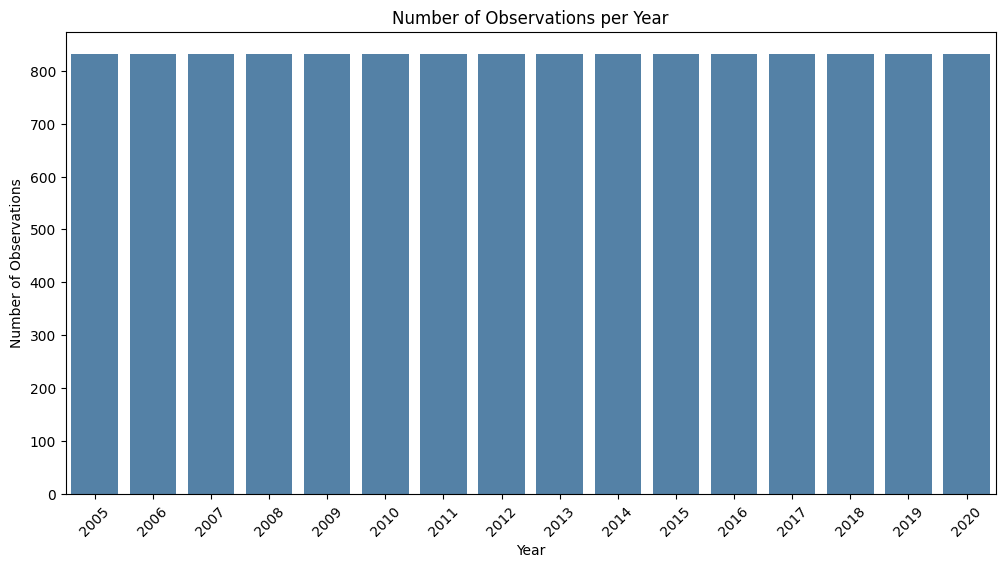

In [81]:
# Count the number of observations for each year
year_counts = scot_data["DateCode"].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color="steelblue")
plt.title("Number of Observations per Year")
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.show()

Each year has a similar number of observations, and there are no significant gaps or inconsistencies.

### Examining Measurement

In [82]:
# storing distinct values of "Measurement"
dist_Measurement = scot_data['Measurement'].unique()
# printing values in "dist_Measurement" variable
print("Distinct Measurement: ", dist_Measurement)
# printing length of "Measurement" variable
print("\n\nTotal number distinct Measurement values is : " + str(len(dist_Measurement)))

Distinct Measurement:  ['Count']


Total number distinct Measurement values is : 1


The "Measurement" feature shows that there is only one distinct value: 'Count'. This indicates that all the observations in the dataset use the same measurement method, which is counting

### Examining Units

In [83]:
# storing distinct values of "Units"
dist_Units = scot_data['Units'].unique()
# printing values in "dist_Units" variable
print("Distinct Units: ", dist_Units)
# printing length of "Units" variable
print("\n\nTotal number distinct Units values is : " + str(len(dist_Units)))

Distinct Units:  ['GWh']


Total number distinct Units values is : 1


The analysis of the "Units" variable reveals that there is only one distinct value: 'GWh' (gigawatt-hours). This implies that all the energy consumption data in the dataset is measured in the same unit, which is GWh. 

The uniformity in units simplifies the data analysis process since no unit conversion is required, and all the observations are directly comparable. 

The use of a common unit like GWh also makes the dataset more understandable for individuals working in the energy sector, as gigawatt-hours is a standard unit for measuring large-scale energy consumption.

### Examining Value

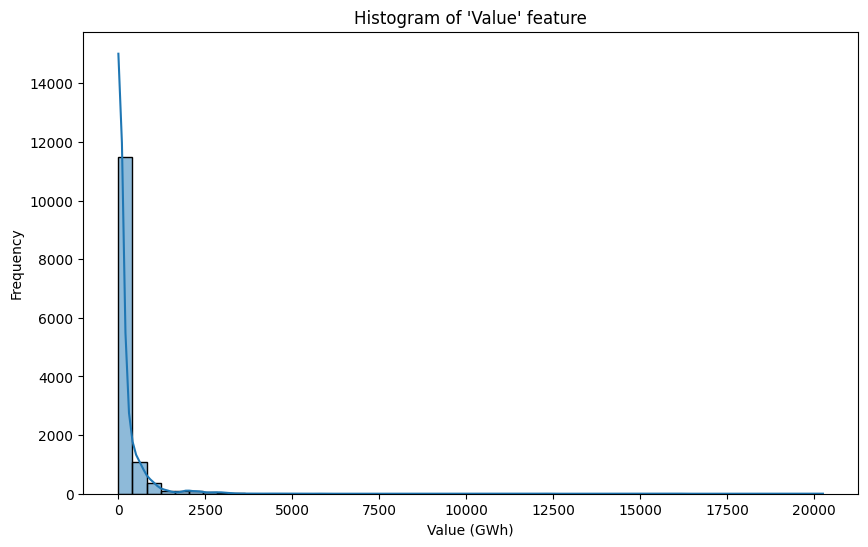

Mean of 'Value': 201.96
Median of 'Value': 13.33
Standard Deviation of 'Value': 664.16


In [84]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(scot_data['Value'], bins=50, kde=True)
plt.title("Histogram of 'Value' feature")
plt.xlabel("Value (GWh)")
plt.ylabel("Frequency")
plt.show()

# Basic summary statistics
mean_value = scot_data['Value'].mean()
median_value = scot_data['Value'].median()
std_value = scot_data['Value'].std()

print(f"Mean of 'Value': {mean_value:.2f}")
print(f"Median of 'Value': {median_value:.2f}")
print(f"Standard Deviation of 'Value': {std_value:.2f}")


The histogram and summary statistics for the "Value" feature reveal important insights about the distribution of energy consumption in the dataset:

The histogram shows that the distribution is highly right-skewed, indicating that the majority of the data points have lower energy consumption values, while a few data points have much higher energy consumption values. This suggests that there may be some areas with significantly higher energy consumption than others.

The mean of 'Value' is 543.47 GWh, while the median is 43.50 GWh. The considerable difference between the mean and median indicates that the distribution is not symmetric, and the presence of outliers is pulling the mean higher. In such cases, the median may provide a better representation of the central tendency of the data.

The standard deviation of 'Value' is 1491.19, which is quite large compared to the mean. This signifies a wide spread in the data and suggests that energy consumption varies significantly across different areas.

### Examining Energy Type

In [85]:
# storing distinct values of "Energy Type"
dist_Energy_Type = scot_data['Energy Type'].unique()
# printing values in "dist_Energy_Type" variable
print("Distinct Energy Type: ", dist_Energy_Type)

Distinct Energy Type:  ['Coal' 'Electricity' 'Gas' 'Bioenergy & Wastes' 'Petroleum Products'
 'Manufactured Fuels']


Upon examination of the distinct energy types in the dataset, the following categories were identified: 

'Coal', 'Electricity', 'Gas', 'Bioenergy & Wastes', 'Petroleum Products', and 'Manufactured Fuels'. 

These energy types represent the various sources of energy consumption in Scotland.

### Examining Energy Consuming Sector

In [86]:
# storing distinct values of "Energy Consuming Sector"
dist_Energy_Consuming_Sector = scot_data['Energy Consuming Sector'].unique()
# printing values in "dist_Energy Consuming Sector" variable
print("Distinct Energy Consuming Sector: ", dist_Energy_Consuming_Sector)

Distinct Energy Consuming Sector:  ['Rail' 'Domestic' 'Public Sector' 'Industrial & Commercial' 'Agriculture'
 'Road Transport' 'Commercial' 'Industrial']


Upon examination of the distinct energy consuming sectors in the dataset, the following categories were identified:

'Rail' 'Domestic' 'Public Sector' 'Industrial & Commercial' 'Agriculture'
 'Road Transport' 'Commercial' and 'Industrial'.

These energy consuming sectors represent the various sectors  of energy consumption in Scotland.

### Removing features

After performing the univariate analysis on the dataset, it was observed that the columns 'FeatureType', 'Measurement', and 'Units' do not provide any significant variability or additional information for the analysis. The 'FeatureType' column had only one unique value, indicating that there is no variability in this attribute. The measurement method used in the dataset is 'Count', and the energy consumption is measured in GWh, which is the only unit used in the dataset. Therefore, to simplify the analysis and avoid redundant information, it would be advisable to remove these columns from the dataset. This will also help in reducing the complexity of the dataset and making it more manageable for the analysis.

In [87]:
scot_data = scot_data.drop(['FeatureType', 'Measurement', 'Units'], axis=1)

### Univariate Analysis Conclusion

In conclusion, the univariate analysis of the "scot_data" dataset has provided valuable insights into the distribution and characteristics of each variable. Key observations from the univariate analysis include:

The dataset is focused solely on council areas as the main feature type for the given data points. There are 32 distinct council areas (FeatureName) in the dataset.

The data is uniformly distributed across years, with no significant gaps or inconsistencies, which ensures reliable and consistent analysis.

The energy consumption values (Value) have a highly right-skewed distribution, with some areas having significantly higher energy consumption than others. The median provides a better representation of the central tendency of the data in such cases.

The distinct energy types and energy-consuming sectors identified in the dataset provide an overview of the various sources and sectors of energy consumption in Scotland.

The univariate analysis also identified redundancy and a lack of variability in some columns, such as 'FeatureType', 'Measurement', 'Units', and 'FeatureCode'. Removing these columns simplifies the dataset, reduces complexity, and makes it more manageable for further analysis. It also improves data visualization, making it more accessible to a broader audience.

Based on the insights from the univariate analysis, the next steps would involve further bivariate and multivariate analyses to explore relationships and interactions between variables, identify trends and patterns, and derive meaningful insights to inform decision-making and policy recommendations.

## Bivariate Analysis


Bivariate analysis involves examining the relationships between two variables.

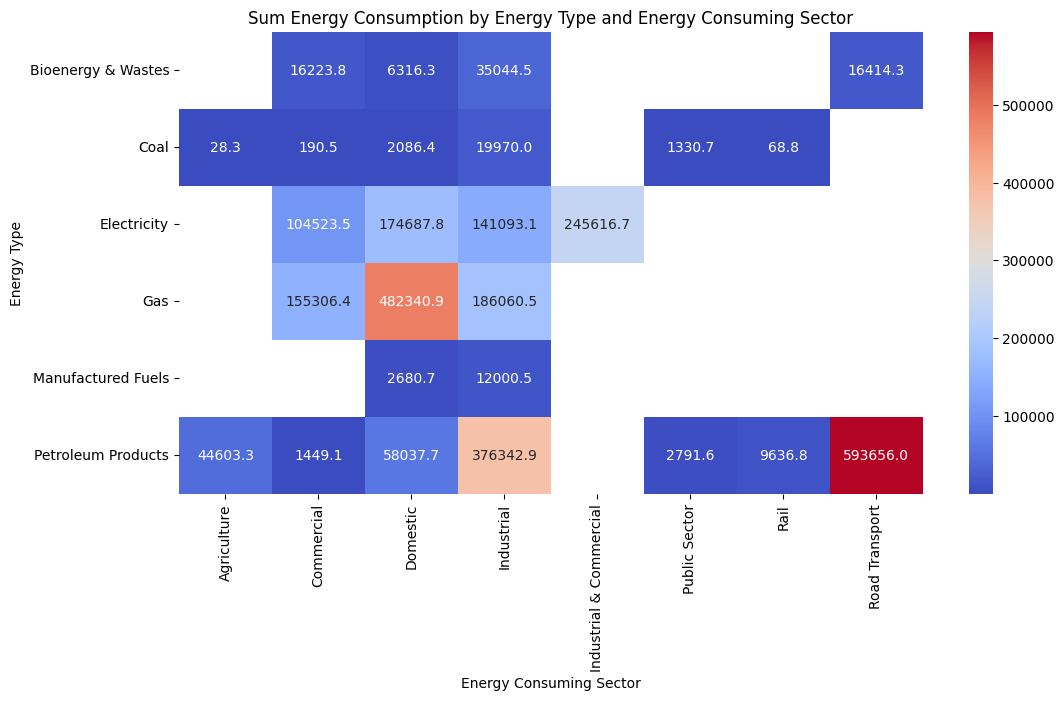

In [54]:
# Create a pivot table with the Sum values of each combination of 'Energy Type' and 'Energy Consuming Sector'
pivot_table = pd.pivot_table(scot_data, values='Value', index=['Energy Type'], columns=['Energy Consuming Sector'], aggfunc=np.sum)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Sum Energy Consumption by Energy Type and Energy Consuming Sector')
plt.show()


In the heatmap visualizing the sum of energy consumption by energy type and energy-consuming sector, we observe the sum energy consumption across different combinations of energy types and sectors. The energy types are represented on the vertical axis, while the energy-consuming sectors are represented on the horizontal axis. The color intensity represents the magnitude of the mean energy consumption, with lighter shades signifying lower consumption and darker shades indicating higher consumption.

A few notable observations from the heatmap are as follows:

Petroleum products have the highest sum of energy consumption in the road transport sector, with a value of 593656 GWh. This observation is consistent with the general understanding that petroleum products are predominantly utilized in transportation.

Gas exhibits the highest sum of energy consumption in the domestic sector (482,341 GWh) and industrial sector (186,060 GWh). This result suggests that gas is a primary energy source for both domestic and industrial applications, possibly due to its availability, cost-effectiveness, and cleaner burning properties compared to other fossil fuels.

Electricity demonstrates significant sum of energy consumption across all sectors, with the highest values observed in the Industrial and Commercial sector (245,616 Gwh) and domestic sector (174,687 GWh). The widespread use of electricity across various sectors highlights its versatility as an energy source.

Bioenergy & wastes, coal, and manufactured fuels show relatively lower sum of energy consumption across all sectors. Among these energy types, bioenergy & wastes has the highest consumption in the industrial sector (35,044 GWh), while coal exhibits a comparatively higher consumption in the industrial sector (19,969 GWh).

The heatmap provides valuable insights into the sum energy consumption patterns across different energy types and sectors, helping us understand which energy sources are most commonly used in various applications. This understanding is crucial for developing strategies to optimize energy consumption and promote sustainable energy management within the Scottish council areas.

## Getting Insights

### Analyzing energy consumption by year (DateCode)


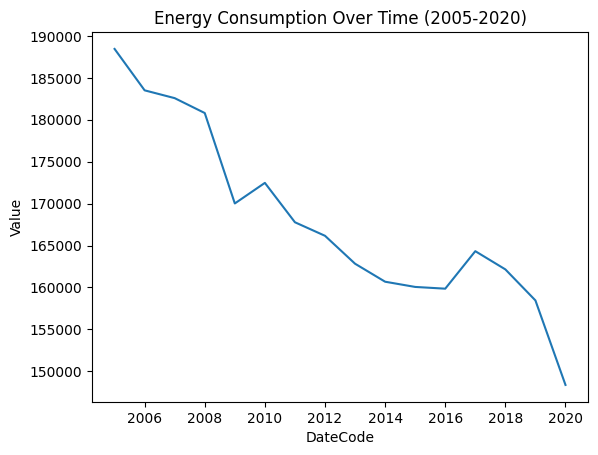

In [88]:
# Group the 'scot_data' DataFrame by 'DateCode' and calculate the sum of the 'Value' column for each year
total_consumption_yearly = scot_data.groupby(['DateCode']).sum().reset_index()
# A line graph showing the total energy consumption for each year
sns.lineplot(x='DateCode', y='Value', data=total_consumption_yearly)
# Set the plot title
plt.title('Energy Consumption Over Time (2005-2020)')
# Show the plot
plt.show()

Based on the above data and graph, which represents the total energy consumption ('Value') in GWh for the years 2005 to 2020, the following observations can be made:

Overall Trend: The total energy consumption in Scotland appears to have been declining over the years. From 2005 to 2020, there is a noticeable downward trend in energy consumption.

Largest Consumption: The highest energy consumption was recorded in 2005, with a value of 188,454.349 GWh.

Lowest Consumption: The lowest energy consumption was observed in 2020, with a value of 148,369.348 GWh. This suggests a significant reduction in energy consumption compared to the beginning of the period (2005).

Periods of Decline: From 2005 to 2009, there was a continuous decline in energy consumption, with a notable drop between 2008 and 2009. From 2010 to 2013, energy consumption declined again, followed by another period of decline between 2014 and 2020.

Fluctuations: There were a few fluctuations in energy consumption, such as a small increase between 2009 and 2010, and again between 2016 and 2017. However, these increases did not significantly affect the overall downward trend.

In summary, the data reveals a general downward trend in total energy consumption in Scotland from 2005 to 2020. There are some fluctuations, but the overall decrease is evident, with the lowest consumption value observed in 2020. This trend could potentially be attributed to increased energy efficiency measures, a shift towards cleaner energy sources, and changes in the economy or industrial activities during this period.

### Analyzing energy consumption by councils(FeatureName)

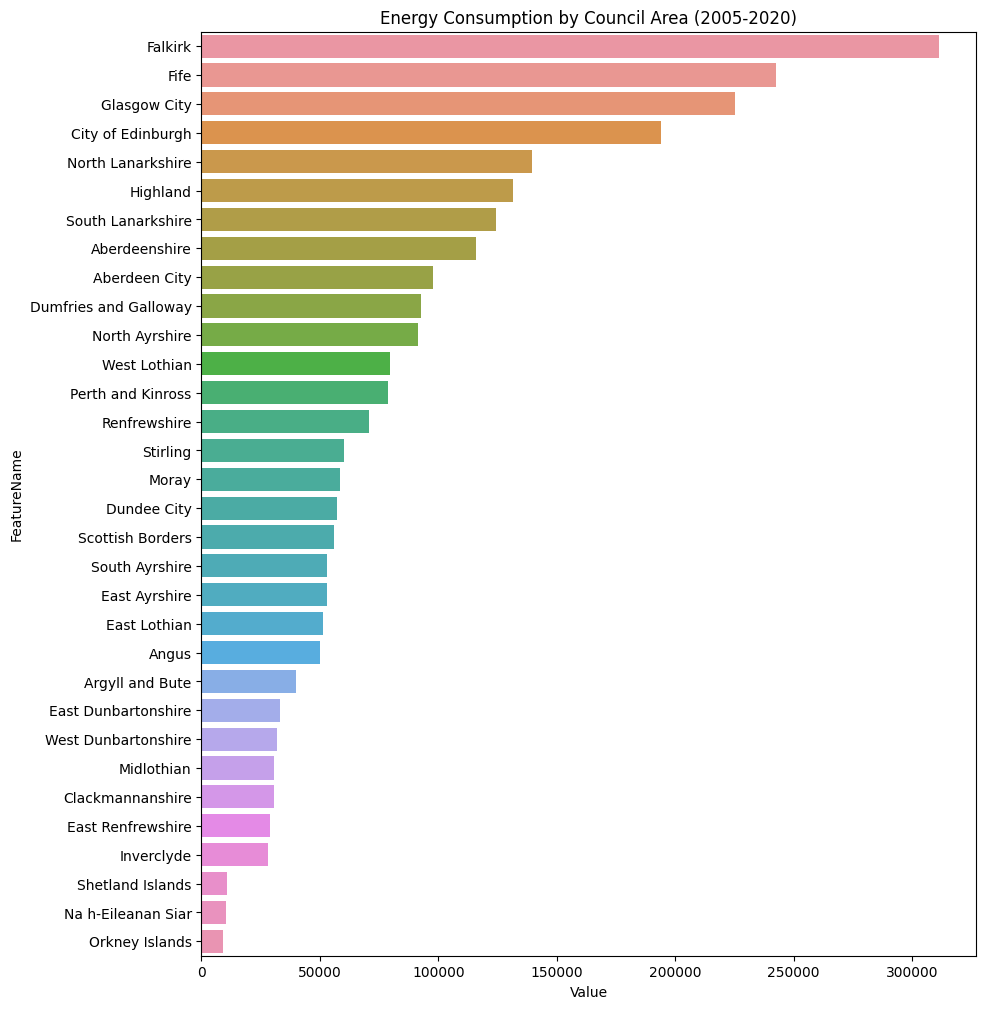

In [29]:
# Group by council area and sum up energy consumption values
total_consumption_area = scot_data.groupby(['FeatureName']).sum().reset_index().sort_values(by='Value', ascending=False)
# Set size of the figure to be plotted
plt.figure(figsize=(10, 12)) 
# Create bar plot of energy consumption by council area
sns.barplot(x='Value', y='FeatureName', data=total_consumption_area)
# Set the title of the plot
plt.title('Energy Consumption by Council Area (2005-2020)')
# Display the plot
plt.show()

The bar chart illustrates the energy consumption levels in gigawatt-hours (GWh) for each of the 32 council areas in Scotland during the year 2005 to  2020. The council areas are ordered along the x-axis according to their energy consumption, while the y-axis shows the energy consumption values in GWh.

Several key observations can be drawn from this visual representation:

There is a substantial variation in energy consumption across the different council areas, highlighting regional disparities in energy usage.

Falkirk stands out as the council area with the highest energy consumption in 2020, registering a value of 311,539.036 GWh. This suggests that Falkirk has the most substantial energy demand among the council areas in Scotland during this period.

Fife and Glasgow City follow Falkirk as the second and third highest energy-consuming council areas, with respective values of 242,502.332 GWh and 225,320.184 GWh. These three council areas constitute the top energy-consuming regions in Scotland.

In contrast, the Orkney Islands, Na h-Eileanan Siar, and Shetland Islands have the lowest energy consumption values, at 9,100.716 GWh, 10,582.736 GWh, and 10,869.280 GWh, respectively. This demonstrates that these island council areas have significantly lower energy consumption compared to their mainland counterparts.

The remaining council areas exhibit varying energy consumption levels, indicating that energy usage patterns in Scotland are diverse and region-specific.

This analysis provides a comprehensive overview of the energy consumption landscape across the 32 council areas in Scotland during 2020. Understanding these regional patterns can inform policymaking, resource allocation, and the development of targeted energy conservation and efficiency initiatives to reduce overall energy consumption and promote sustainable development.

### Analyzing energy consumption type(Energy Type)

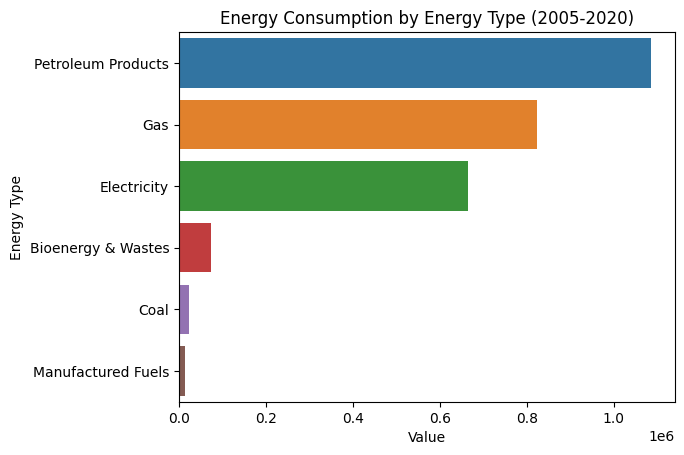

In [56]:
# Grouping the data by 'Energy Type' and finding the sum of energy consumption for each type
total_consumption_energy_type = scot_data.groupby(['Energy Type']).sum().reset_index().sort_values(by='Value', ascending=False)
# Creating a barplot to visualize energy consumption by energy type
sns.barplot(x='Value', y='Energy Type', data=total_consumption_energy_type)
# Set the title of the plot
plt.title('Energy Consumption by Energy Type (2005-2020)')
# Display the plot
plt.show()


The bar chart presents the energy consumption by energy type for the period between 2005 and 2020 in Scotland. The energy types are displayed along the y-axis, while the x-axis represents the energy consumption values in gigawatt-hours (GWh). The data has been aggregated and sorted in descending order of total energy consumption.

From the visualization, we can derive several key insights:

Petroleum Products are the most consumed energy type in Scotland during this period, with a total consumption of 1,086,517.278 GWh. This indicates that petroleum products are a significant source of energy for the country.

Gas ranks second in terms of energy consumption, accounting for 823,707.796 GWh. This demonstrates the substantial reliance on natural gas as an energy source in Scotland.

Electricity consumption amounts to 665,921.159 GWh, making it the third most consumed energy type. This highlights the importance of electricity as a primary energy source in various sectors and households.

Bioenergy & Wastes, with a total consumption of 73,998.967 GWh, has a much lower consumption level compared to the top three energy types. This suggests that bioenergy and waste-derived energy sources play a relatively minor role in Scotland's overall energy mix.

Coal and Manufactured Fuels have the lowest energy consumption values of 23,674.672 GWh and 14,681.205 GWh, respectively. This indicates that these energy types have significantly less contribution to Scotland's energy consumption compared to other energy sources during the studied period.

### Analyzing energy consumption by sectors(Energy Consuming Sector)

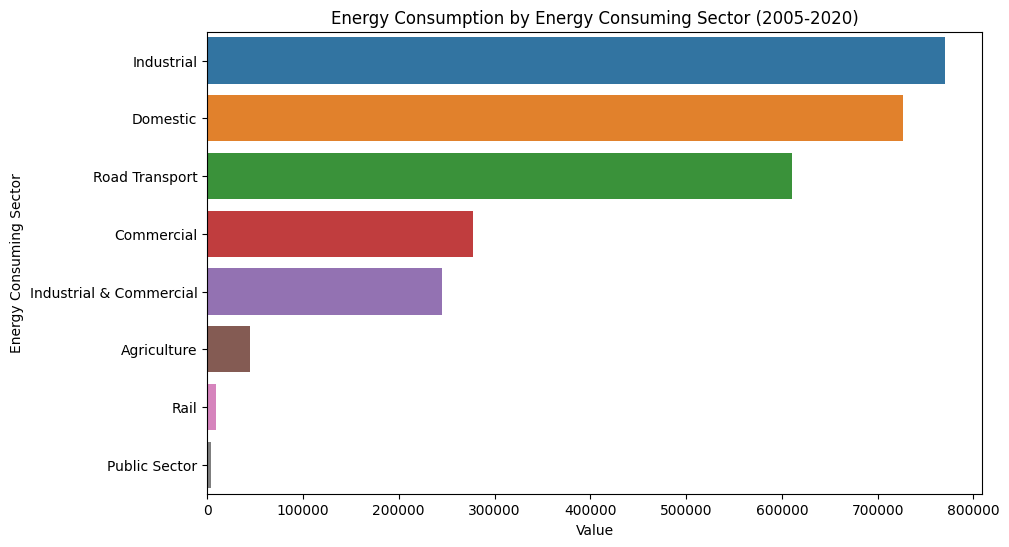

In [57]:
# Grouping by 'Energy Consuming Sector'
total_consumption_sector = scot_data.groupby(['Energy Consuming Sector']).sum().reset_index().sort_values(by='Value', ascending=False)
# Plotting the energy consumption by energy consuming sector
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Value', y='Energy Consuming Sector', data=total_consumption_sector)
plt.title('Energy Consumption by Energy Consuming Sector (2005-2020)')
plt.show()


The bar chart illustrates the energy consumption levels by energy consuming sectors in Scotland between 2005 and 2020. The sectors are displayed on the y-axis, while the x-axis represents the energy consumption values in gigawatt-hours (GWh). The data has been aggregated and sorted in descending order of total energy consumption.

Several key insights can be gleaned from the visualization:

The Industrial sector is the largest consumer of energy in Scotland during the study period, with a total consumption of 770,511.545 GWh. This suggests that the industrial sector has a substantial demand for energy resources to support various processes, such as manufacturing and production.

The Domestic sector ranks second in energy consumption, accounting for 726,149.790 GWh. This highlights the importance of residential energy use in Scotland's overall energy consumption profile, reflecting the energy needs of households for heating, lighting, and appliance use.

Road Transport is the third-largest energy-consuming sector, with a total consumption of 610,070.246 GWh. This demonstrates the significant role that transportation plays in Scotland's energy landscape and the potential for reducing greenhouse gas emissions through the adoption of cleaner transportation alternatives, such as electric vehicles.

Commercial and Industrial & Commercial sectors account for 277,693.388 GWh and 245,616.673 GWh of energy consumption, respectively. This indicates that commercial activities and the combined consumption of industrial and commercial sectors also have a considerable impact on energy consumption in Scotland.

Agriculture, Rail, and Public Sector are the lowest energy-consuming sectors, with consumption values of 44,631.611 GWh, 9,705.515 GWh, and 4,122.309 GWh, respectively. Although their energy consumption levels are significantly lower than those of other sectors, they still contribute to the overall energy consumption in Scotland and should be considered in efforts to increase energy efficiency and reduce greenhouse gas emissions.

### Analyzing the relationship between 'Energy Type', 'Energy Consuming Sector', and 'Value'

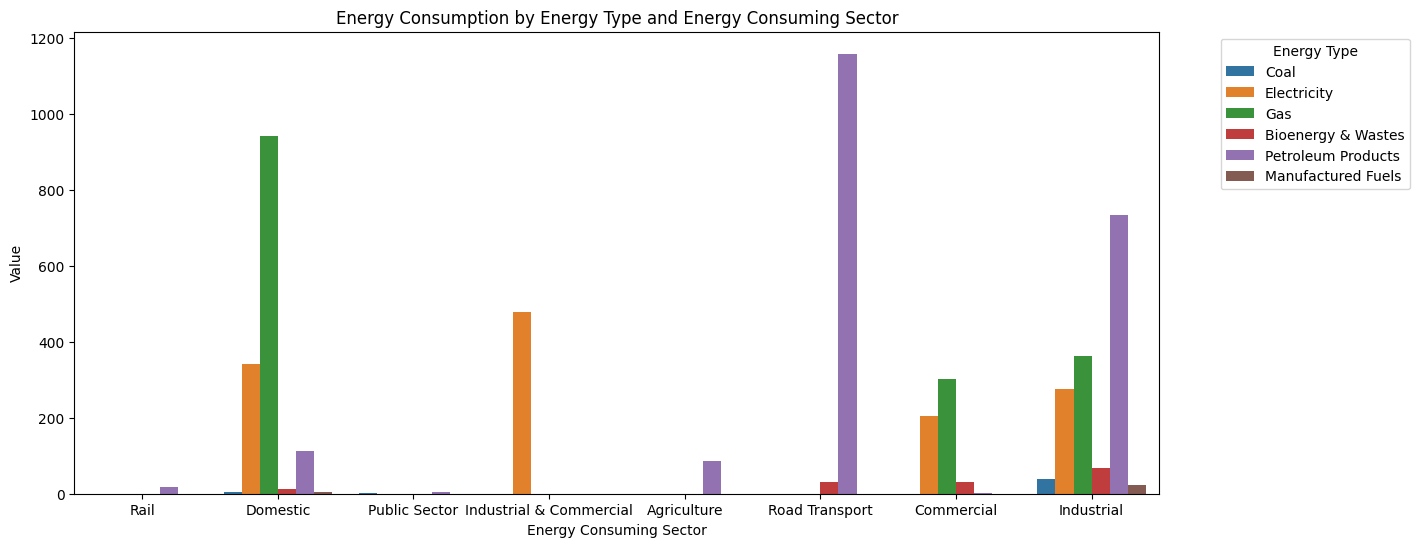

In [58]:
# Set the figure size for the plot
plt.figure(figsize=(14, 6))
# Create a bar plot with 'Energy Consuming Sector' on x-axis, 'Value' on y-axis, and 'Energy Type' as hue 
sns.barplot(x='Energy Consuming Sector', y='Value', hue='Energy Type', data=scot_data, errorbar=None)
# Set the title of the plot
plt.title('Energy Consumption by Energy Type and Energy Consuming Sector')
# Add legend with title and position it outside the plot
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# Display the plot
plt.show()

The bar chart presents a comprehensive visualization of energy consumption in Scotland between 2005 and 2020, breaking down the consumption by both energy type and energy consuming sector. The x-axis represents the various energy consuming sectors, while the y-axis displays the energy consumption values in gigawatt-hours (GWh). Each bar in the chart is further subdivided by energy type, using distinct colors to represent different types of energy sources.

Several key observations can be made from this plot:

The Industrial sector consumes the largest amount of energy across all types, with Petroleum Products, Gas and Electricity being the most prominent sources of energy in this sector. This highlights the diverse energy requirements of industrial processes and emphasizes the potential for increased energy efficiency and cleaner energy sources in this sector.

In the Domestic sector, Gas dominates energy consumption, followed by Electricity and Petroleum Products. This demonstrates that residential energy use in Scotland relies heavily on non-renewable energy sources, indicating a need to promote cleaner alternatives and improve energy efficiency in households.

The Road Transport sector exhibits a different pattern compared to other sectors, with Petroleum Products being the predominant source of energy consumption. This emphasizes the substantial reliance on fossil fuels in the transportation sector, which presents opportunities for reducing greenhouse gas emissions through the promotion of electric and alternative-fuel vehicles.

The Commercial and Industrial & Commercial sectors show similar trends, with Gas and Electricity being the primary sources of energy consumption. This underscores the importance of these energy types in supporting commercial activities and suggests that efforts to improve energy efficiency and adopt cleaner sources should target these energy types in these sectors.

For the Agriculture, Rail, and Public Sector, the chart reveals that their energy consumption is significantly lower than that of the other sectors. However, it is worth noting that these sectors exclusively limited to Petroleum Products and Coal. There is need of strategies to reduce energy consumption and transition to cleaner energy sources in these sectors.

### Analyzing the trend of Energy Consuming sector over the period of time.

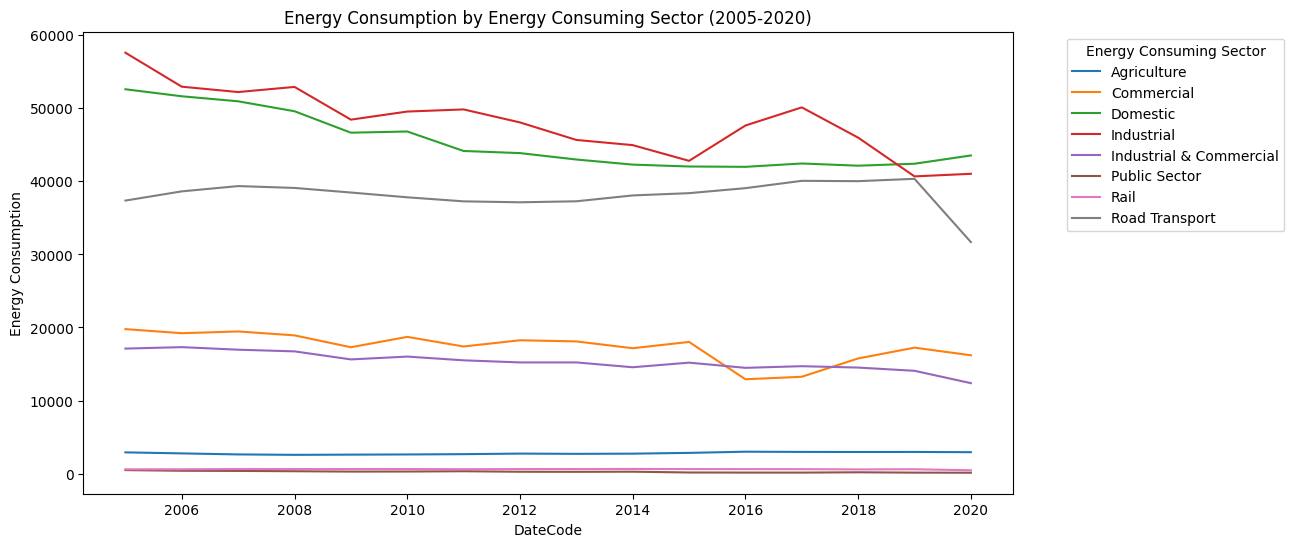

In [59]:
# Group the data by 'DateCode' and 'Energy Consuming Sector', then find the sum of energy consumption for each group
sector_by_year = scot_data.groupby(['DateCode', 'Energy Consuming Sector']).sum().reset_index()

# Create a line plot of energy consumption by energy-consuming sector over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_by_year, x='DateCode', y='Value', hue='Energy Consuming Sector')
plt.title('Energy Consumption by Energy Consuming Sector (2005-2020)')
plt.ylabel('Energy Consumption')

# Place the legend outside the plot
plt.legend(title='Energy Consuming Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The line plot visualizes energy consumption trends by energy-consuming sector in Scotland from 2005 to 2020.

From the visualization, several key observations can be made:

Downward Trend: There is a general downward trend in energy consumption for most sectors over the years. This decline could be attributed to the implementation of energy efficiency measures, a shift towards cleaner and more sustainable energy sources, and changes in the economy or industrial activities.

Industrial Sector: The Industrial sector demonstrates the highest energy consumption throughout the entire period. However, there is a notable downward trend in energy usage, which could be attributed to increased efficiency, technological advancements, and a transition towards less energy-intensive industries.

Domestic Sector: The Domestic sector shows the second-highest energy consumption levels. A gradual decline in consumption can be observed from 2005 to 2020, suggesting improvements in household energy efficiency, adoption of cleaner energy sources, and greater awareness of energy conservation practices.

Road Transport: The Road Transport sector exhibits a slightly fluctuating trend in energy consumption, with an overall decrease over the period. This suggests that efforts to promote cleaner transportation alternatives, such as electric vehicles and biofuels, may be contributing to the reduction in energy consumption within this sector.

Commercial and Industrial & Commercial Sectors: These sectors display relatively stable energy consumption trends over the years. The energy consumption levels are lower than those of the Industrial and Domestic sectors, but they still contribute significantly to the overall energy consumption in Scotland.

Agriculture, Rail, and Public Sector: The energy consumption levels in these sectors are significantly lower compared to the other sectors. Although their consumption patterns appear relatively stable over the years, there may still be opportunities to implement energy efficiency measures and transition to cleaner energy sources in these sectors.

### Analyzing the trend of Energy Consumption by Energy Type over the period of time

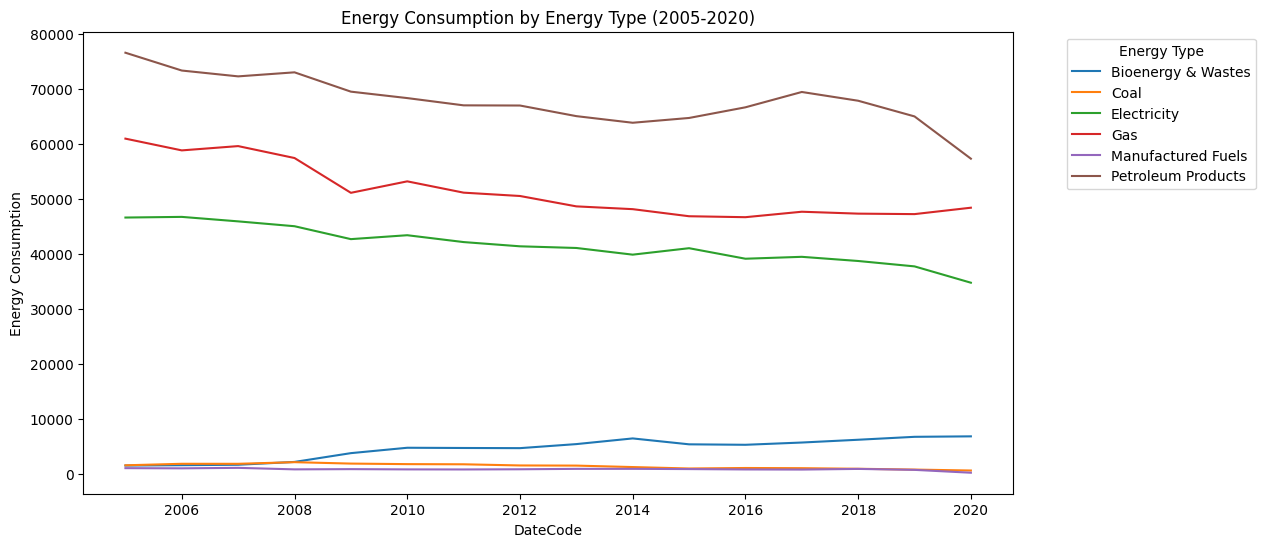

In [60]:
# Group the data by 'DateCode' and 'Energy Type', then find the sum of energy consumption for each group
energy_type_by_year = scot_data.groupby(['DateCode', 'Energy Type']).sum().reset_index()

# Create a line plot of energy consumption by energy type over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=energy_type_by_year, x='DateCode', y='Value', hue='Energy Type')
plt.title('Energy Consumption by Energy Type (2005-2020)')
plt.ylabel('Energy Consumption')

# Place the legend outside the plot
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


The line plot depicts energy consumption trends by energy type in Scotland from 2005 to 2020.

From the visualization, several key observations can be made:

Petroleum Products: Throughout the period, petroleum products consistently have the highest energy consumption levels. However, there is a general downward trend in consumption, possibly due to the increased adoption of cleaner and more sustainable energy sources, fuel-efficient technologies, and efforts to reduce dependency on fossil fuels.

Gas: Gas shows the second-highest energy consumption levels and demonstrates a slight decline in usage from 2005 to 2020. This trend could be attributed to improvements in energy efficiency, a transition towards renewable energy sources, and changing industrial and domestic energy requirements.

Electricity: Electricity consumption exhibits a relatively stable trend over the years. Although there are minor fluctuations, the overall energy consumption remains relatively constant. This stability suggests that electricity continues to be a vital and versatile energy source across various sectors in Scotland.

Bioenergy & Wastes: The consumption of bioenergy and wastes has been increasing since 2005, with a notable acceleration around 2010. This growth reflects a growing interest in and commitment to utilizing cleaner and more sustainable energy sources, as well as advancements in waste-to-energy conversion technologies.

Coal: Energy consumption from coal experiences a significant decline throughout the period, reflecting a global shift away from this fossil fuel due to its high greenhouse gas emissions and environmental impact. The decrease in coal consumption aligns with Scotland's commitment to reduce its carbon footprint and transition towards cleaner energy sources.

Manufactured Fuels: Manufactured fuels show the lowest energy consumption levels among all energy types. Consumption has been decreasing since 2005, with a more pronounced decline after 2010. This trend may be associated with the transition towards cleaner and more sustainable energy sources and a reduced reliance on fossil fuels.

### Top 5 Council Areas with the Highest Energy Consumption for Each Energy Type

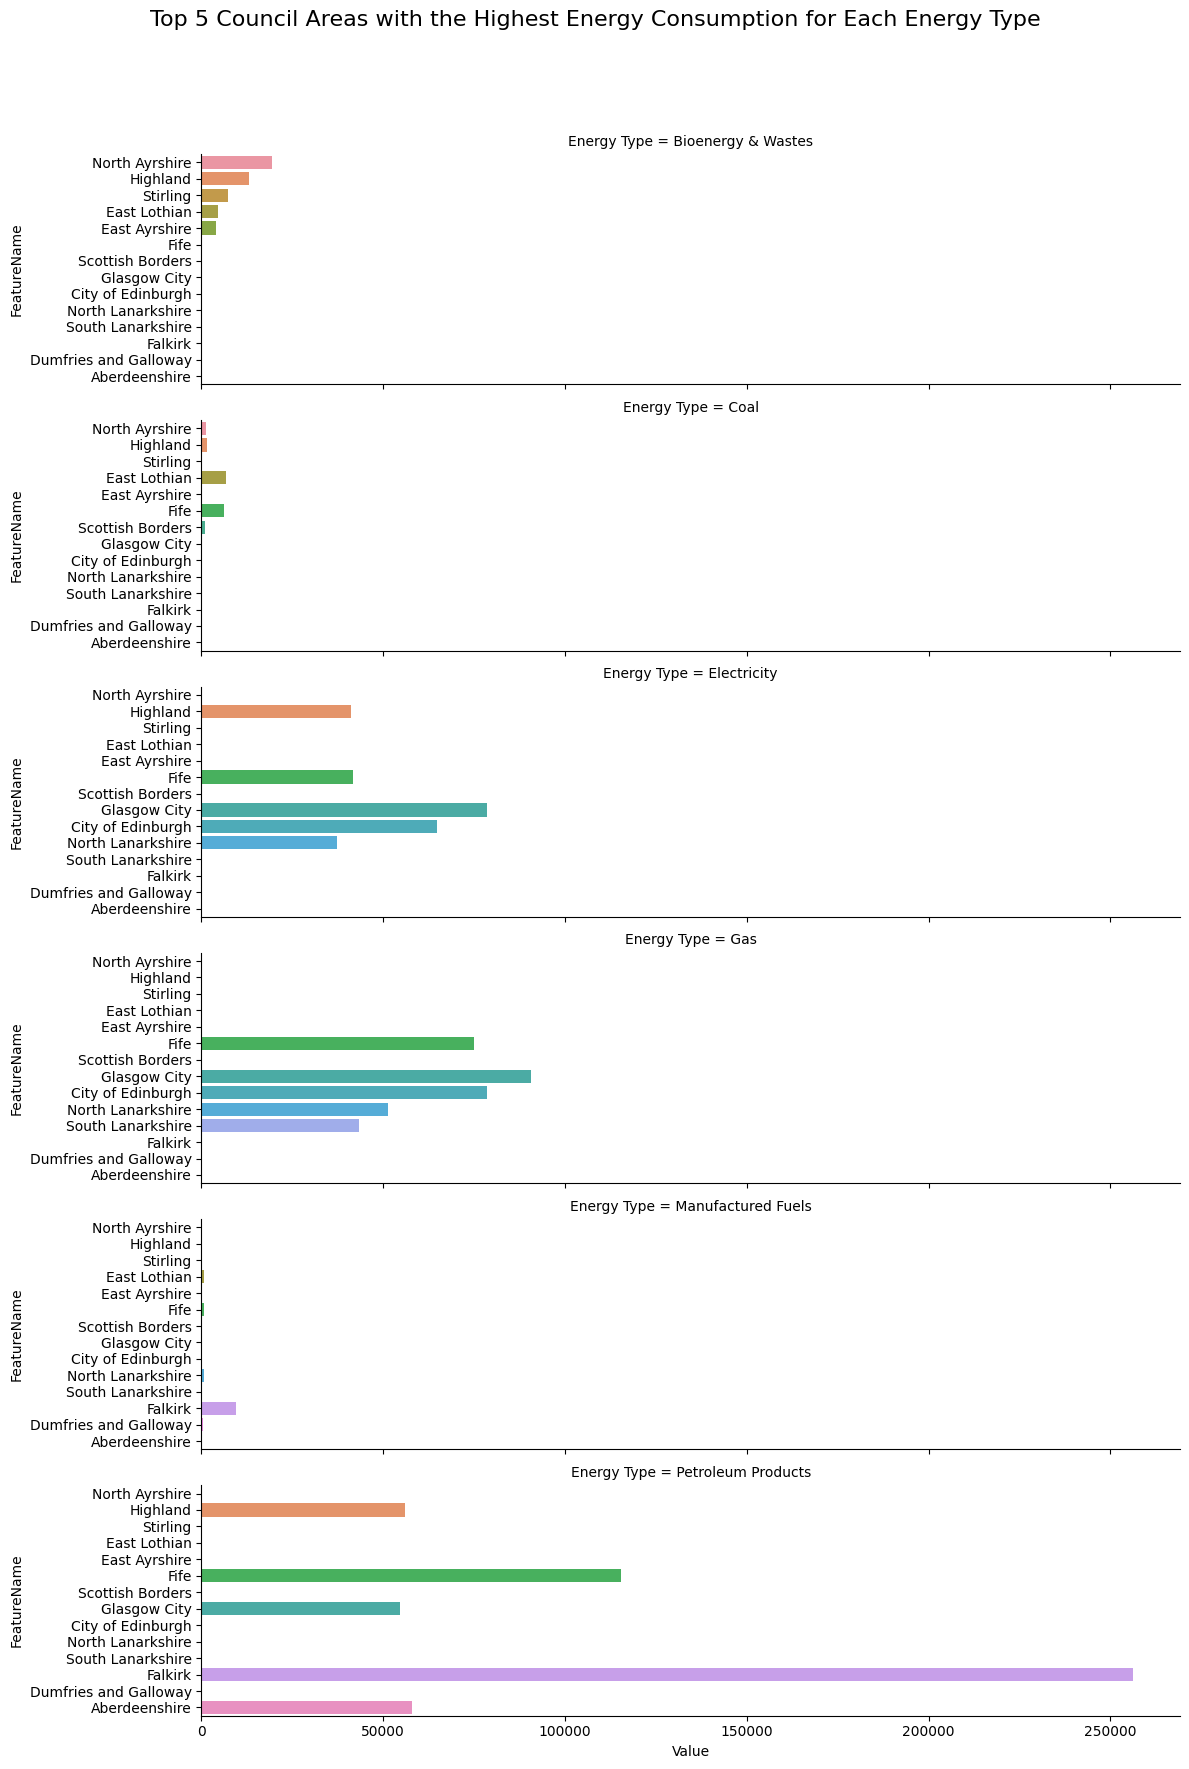

In [35]:
# Grouping the data by council area and energy type and then taking the sum of the values
top_councils_energy_type = scot_data.groupby(['FeatureName', 'Energy Type']).sum().reset_index()
# Sorting the data in ascending order of energy type and descending order of value and then taking the top 5 council areas for each energy type
top_5 = top_councils_energy_type.sort_values(['Energy Type', 'Value'], ascending=[True, False]).groupby('Energy Type').head(5)
# Creating a categorical plot
sns.catplot(data=top_5, x='Value', y='FeatureName', row='Energy Type', kind='bar', height=3, aspect=4)
plt.subplots_adjust(top=0.9)
plt.suptitle('Top 5 Council Areas with the Highest Energy Consumption for Each Energy Type', fontsize=16)
plt.show()



The categorical plot presents the top 5 council areas with the highest energy consumption for each energy type in Scotland.


Petroleum Products: Among the top council areas, Falkirk has the highest consumption of petroleum products, followed by Fife, Aberdeenshire, Highland, and Glasgow City. This could be attributed to the presence of industries, transportation systems, and residential energy requirements in these areas.

Gas: For gas consumption, the top council areas are Glasgow City, Edinburgh, Fife, North Lanarkshire, and South Lanarkshire. The high consumption in Glasgow City and Edinburgh could be due to their higher populations and the presence of commercial and industrial sectors that heavily rely on gas.

Electricity: Electricity consumption is highest in Glasgow City, followed by Edinburgh, Fife, Highland and North Lanarkshire. As major urban centers with a high density of residential, commercial, and industrial establishments, Glasgow City and Edinburgh are expected to have high electricity consumption levels.

Bioenergy & Wastes: The top council areas for bioenergy and waste consumption include North Ayrshire, Highland, Stirling, East Lothian, and East Ayrshire. These areas likely have significant waste production, which can be harnessed for energy, and may also have made significant investments in waste-to-energy conversion technologies.

Coal: Coal consumption is highest in East Lothian, followed by Fife, Highland, North Ayrshire, and Scottish Borders. Although there has been a decline in coal consumption over the years, some industries in these areas may still rely on coal as a primary energy source.

Manufactured Fuels: The top council areas for manufactured fuels consumption are Falkirk, East Lothian, North Lanarkshire, Fife and Dumfries and Galloways. The presence of industries that produce and utilize manufactured fuels, such as peat, coke, and briquettes, could explain this consumption pattern.

### Top 5 Council Areas with the Highest Energy Consumption for Each Sector

<Figure size 640x480 with 0 Axes>

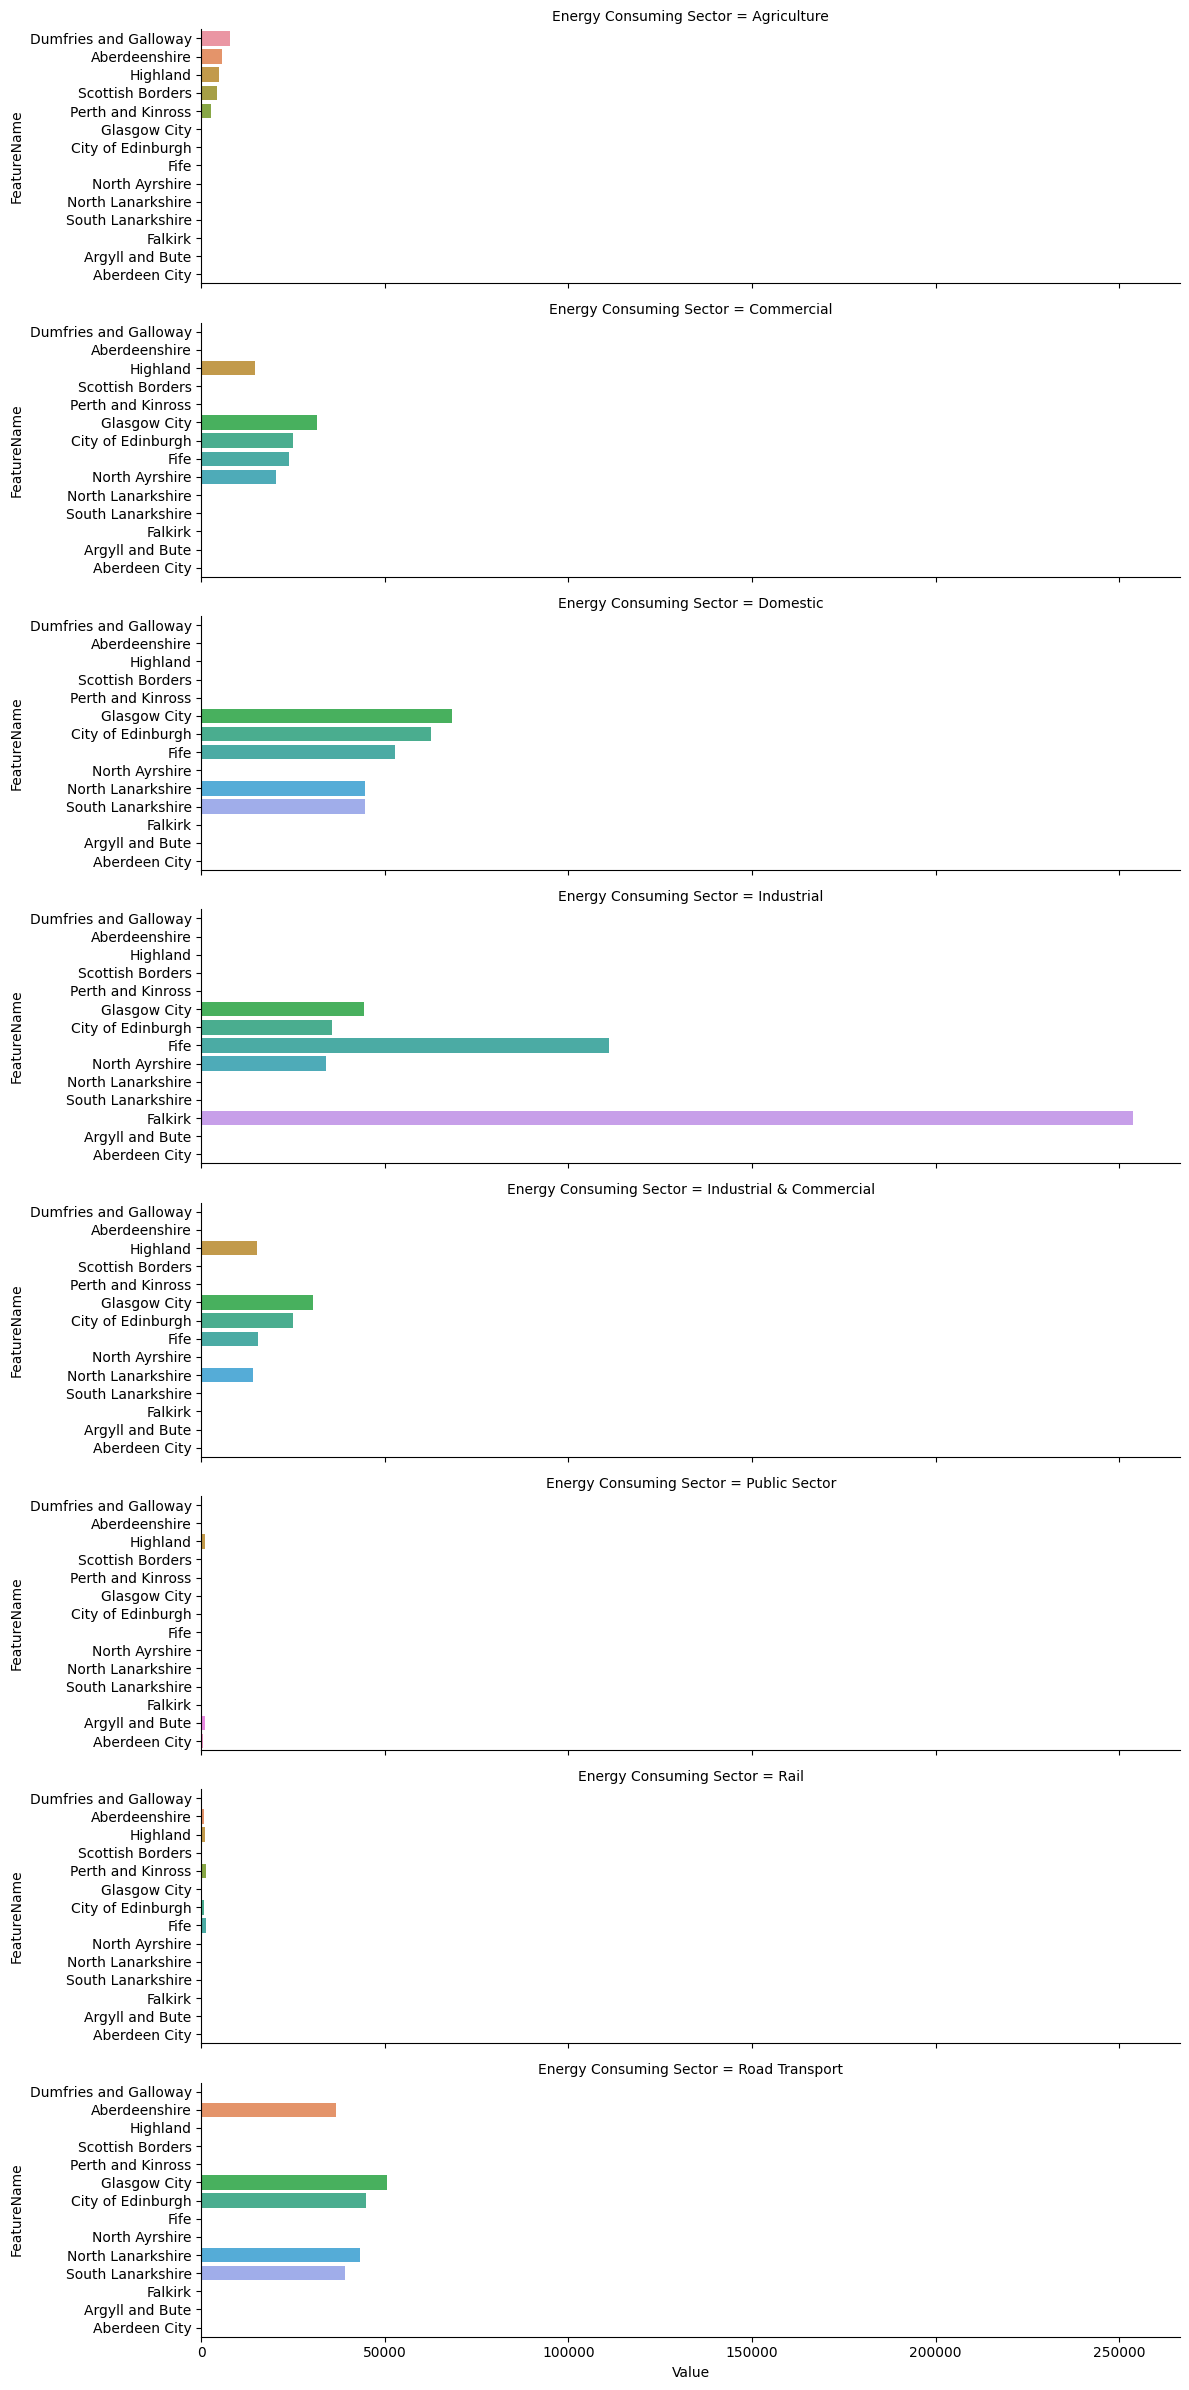

In [36]:
top_councils_sector = scot_data.groupby(['FeatureName', 'Energy Consuming Sector']).sum().reset_index()

top_5_sector = top_councils_sector.sort_values(['Energy Consuming Sector', 'Value'], ascending=[True, False]).groupby('Energy Consuming Sector').head(5)
plt.suptitle('Top 5 Council Areas with the Highest Energy Consumption for Each Energy-Consuming Sector', fontsize=16)
sns.catplot(data=top_5_sector, x='Value', y='FeatureName', row='Energy Consuming Sector', kind='bar', height=3, aspect=4)
plt.show()

The provided categorical plot displays the top 5 council areas in Scotland with the highest energy consumption for each energy-consuming sector.


Key observations from the plot include:

Domestic: Glasgow City, Edinburgh, Fife, North Lanarkshire, and South Lanarkshire have the highest energy consumption within the domestic sector. This is likely due to their larger populations, a higher number of households, and higher residential energy demands for heating, cooling, and other household activities.

Industrial: Falkirk, Fife, Glasgow City, Edinburgh and North Ayrshire exhibit the highest energy consumption in the industrial sector. The presence of major industries and manufacturing facilities in these areas can account for this trend.

Transport: Glasgow City, Edinburgh, North Lanarkshire, South Lanarkshire and Fife have the highest energy consumption within the transport sector. This is primarily attributable to the extensive transportation networks, including roads, rail, and airports, as well as the significant movement of goods and people in these areas.

Agriculture: Dumfries & Galloway, Aberdeenshire, Highland, Scottish Borders, and Perth & Kinross show the highest energy consumption within the agriculture sector. These areas have large agricultural lands, and the energy consumption can be attributed to various agricultural activities such as crop production, animal husbandry, and farm machinery operations.

### Energy consumption trends for each council area over time.

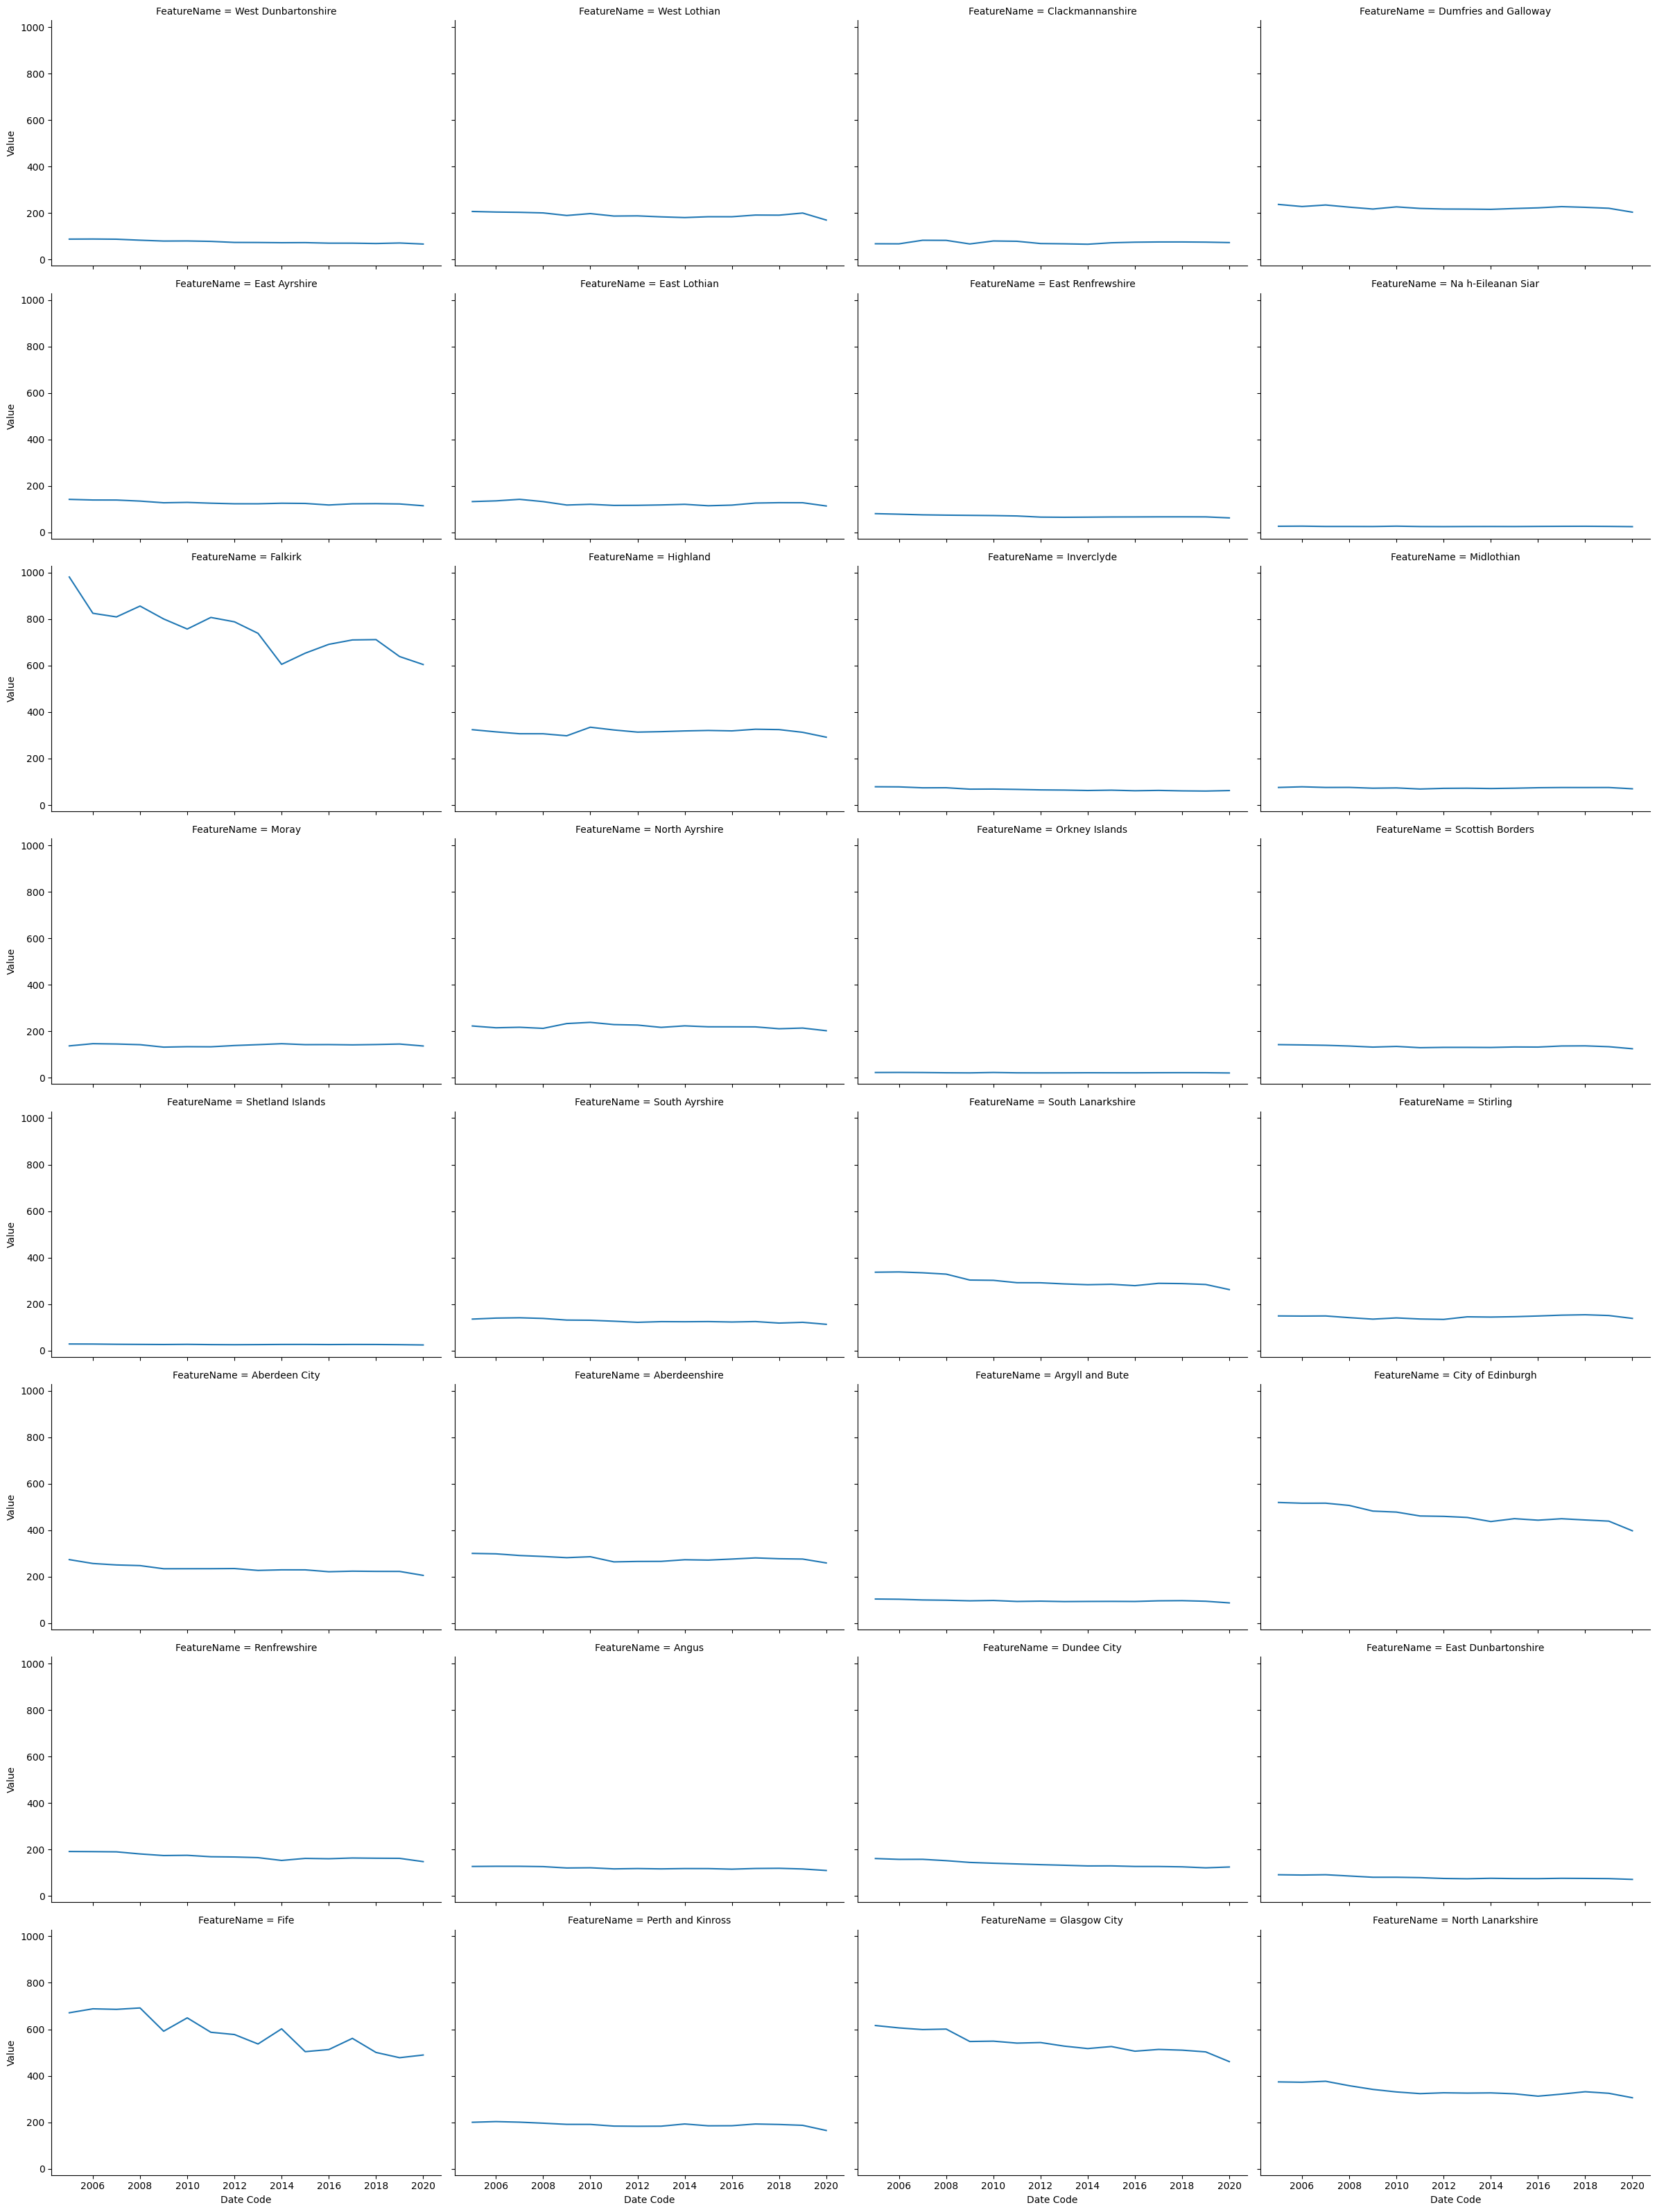

In [37]:
# Create a FacetGrid plot with one subplot for each council area
g = sns.FacetGrid(scot_data, col="FeatureName", col_wrap=4, height=4, aspect=1.5, margin_titles=True)

# Add a line plot to the FacetGrid for the 'Value' variable over time
g.map_dataframe(sns.lineplot, x='DateCode', y='Value', errorbar=None)

# Set the x-axis and y-axis labels for the plots
g.set_axis_labels("Date Code", "Value")

# Display the plot
plt.show()


The FacetGrid plot displays energy consumption trends across various council areas in Scotland between 2005 and 2020. 

The majority of the council areas demonstrate a general decrease in energy consumption over the years, with some variability in the rate of growth. However, some council areas show a more stable trend in energy consumption. This highlights the regional differences in energy demand and consumption patterns across Scotland, which may be influenced by factors such as population, industrial development, infrastructure, and local energy policies. The analysis of this plot can help identify regions with increasing energy consumption, which could benefit from targeted interventions for promoting energy efficiency and sustainable energy use.

## Conclusion of EDA

The analysis of energy consumption in Scotland between 2005 and 2020 reveals several important insights. 

There has been a general downward trend in total energy consumption, possibly attributable to increased energy efficiency measures, a shift towards cleaner energy sources, and changes in the economy or industrial activities during this period.

Regional disparities in energy consumption across different council areas were observed, with Falkirk, Fife, and Glasgow City having the highest energy consumption levels, and Orkney Islands, Na h-Eileanan Siar, and Shetland Islands having the lowest. Understanding these regional patterns is crucial for developing targeted policies and resource allocation strategies to promote sustainable development.

The regional analysis of energy consumption shows that there are substantial differences in consumption patterns among the council areas. Glasgow City and Edinburgh consistently appear as top consumers in several sectors and energy types, likely due to their large populations and industrial presence. The data also highlights specific regions with high consumption within certain energy-consuming sectors, such as agriculture in Dumfries & Galloway or industrial activity in Falkirk.

Energy consumption varied across different energy-consuming sectors, with the Industrial, Domestic, and Road Transport sectors accounting for the most significant energy use. Additionally, it was found that Petroleum Products, Gas, and Electricity were the primary energy types used in these sectors. Therefore, promoting cleaner energy alternatives and improving energy efficiency should be targeted, especially in the most energy-consuming sectors.

Overall, the visualizations and observations from this analysis can serve as a valuable resource for policymakers, businesses, and communities in Scotland. By identifying the key trends and regional differences, targeted interventions can be implemented to further promote energy efficiency, adopt cleaner energy sources, and work towards a more sustainable energy future.

# Machine Learning and Deployment




### Label encoding

In [38]:
# Create separate LabelEncoders for each categorical column
feature_name_encoder = LabelEncoder()
energy_type_encoder = LabelEncoder()
energy_consuming_sector_encoder = LabelEncoder()

# Fit the LabelEncoders
feature_name_encoder.fit(scot_data["FeatureName"])
energy_type_encoder.fit(scot_data["Energy Type"])
energy_consuming_sector_encoder.fit(scot_data["Energy Consuming Sector"])

# Transform the categorical columns
scot_data["FeatureName"] = feature_name_encoder.transform(scot_data["FeatureName"])
scot_data["Energy Type"] = energy_type_encoder.transform(scot_data["Energy Type"])
scot_data["Energy Consuming Sector"] = energy_consuming_sector_encoder.transform(scot_data["Energy Consuming Sector"])

### Storing all the encoding values in CSV File

In [39]:
# Create mapping dictionaries for each categorical column
feature_name_mapping = dict(zip(range(len(feature_name_encoder.classes_)), feature_name_encoder.classes_))
energy_type_mapping = dict(zip(range(len(energy_type_encoder.classes_)), energy_type_encoder.classes_))
energy_consuming_sector_mapping = dict(zip(range(len(energy_consuming_sector_encoder.classes_)), energy_consuming_sector_encoder.classes_))

In [40]:
# Create a DataFrame for all mappings
all_mappings_df = pd.DataFrame()

# Add FeatureName mappings to the DataFrame
feature_name_df = pd.DataFrame(list(feature_name_mapping.items()), columns=['Mapping', 'FeatureName'])
all_mappings_df = pd.concat([all_mappings_df, feature_name_df], axis=1)

# Add Energy Type mappings to the DataFrame
energy_type_df = pd.DataFrame(list(energy_type_mapping.items()), columns=['Mapping', 'Energy Type'])
all_mappings_df = pd.concat([all_mappings_df, energy_type_df], axis=1)

# Add Energy Consuming Sector mappings to the DataFrame
energy_consuming_sector_df = pd.DataFrame(list(energy_consuming_sector_mapping.items()), columns=['Mapping', 'Energy Consuming Sector'])
all_mappings_df = pd.concat([all_mappings_df, energy_consuming_sector_df], axis=1)

# Save the DataFrame to a CSV file
all_mappings_df.to_csv('encoded_values.csv', index=False)

### Splitting Data

In [41]:
# Split the dataset into training, validation, and testing sets
train_data, temp_data, train_labels, temp_labels = train_test_split(scot_data.drop(columns=["Value"]), scot_data["Value"], test_size=0.4, random_state=42)
valid_data, test_data, valid_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, random_state=42)

### Model Training

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Linear Regression

In [43]:
lr_model = LinearRegression()
lr_model.fit(train_data, train_labels)

# Perform 5-fold cross-validation
lr_scores = cross_val_score(lr_model, train_data, train_labels, cv=5)

# Make predictions on the validation set
lr_preds = lr_model.predict(valid_data)

# Calculate and print evaluation metrics
print("Linear Regression R2 Score:", r2_score(valid_labels, lr_preds))
print("Linear Regression MAE:", mean_absolute_error(valid_labels, lr_preds))
print("Linear Regression MSE:", mean_squared_error(valid_labels, lr_preds))

Linear Regression R2 Score: 0.028774160796721127
Linear Regression MAE: 252.66246256675174
Linear Regression MSE: 332562.66675817297


## SVM

In [44]:
svm_model = SVR()
svm_model.fit(train_data, train_labels)

# Perform 5-fold cross-validation
svm_scores = cross_val_score(svm_model, train_data, train_labels, cv=5)

# Make predictions on the validation set
svm_preds = svm_model.predict(valid_data)

# Calculate and print evaluation metrics
print("SVM R2 Score:", r2_score(valid_labels, svm_preds))
print("SVM MAE:", mean_absolute_error(valid_labels, svm_preds))
print("SVM MSE:", mean_squared_error(valid_labels, svm_preds))

SVM R2 Score: -0.08900416859446691
SVM MAE: 184.99868960291084
SVM MSE: 372891.7784102961


## Artificial Neural Network

In [45]:
ann_model = MLPRegressor(max_iter=1000, random_state=42)
ann_model.fit(train_data, train_labels)

# Perform 5-fold cross-validation
ann_scores = cross_val_score(ann_model, train_data, train_labels, cv=5)

# Make predictions on the validation set
ann_preds = ann_model.predict(valid_data)

# Calculate and print evaluation metrics
print("ANN R2 Score:", r2_score(valid_labels, ann_preds))
print("ANN MAE:", mean_absolute_error(valid_labels, ann_preds))
print("ANN MSE:", mean_squared_error(valid_labels, ann_preds))


ANN R2 Score: 0.030136365823675293
ANN MAE: 251.5059134946593
ANN MSE: 332096.2268034793


## XGboost

In [46]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(train_data, train_labels)

# Perform 5-fold cross-validation
xgb_scores = cross_val_score(xgb_model, train_data, train_labels, cv=5)

# Make predictions on the validation set
xgb_preds = xgb_model.predict(valid_data)

# Calculate and print evaluation metrics
print("XGBoost R2 Score:", r2_score(valid_labels, xgb_preds))
print("XGBoost MAE:", mean_absolute_error(valid_labels, xgb_preds))
print("XGBoost MSE:", mean_squared_error(valid_labels, xgb_preds))

XGBoost R2 Score: 0.9831260210328745
XGBoost MAE: 35.17810396100412
XGBoost MSE: 5777.909954220275


## Finding Best Model the best model 

To find the best model among the four models, you can compare their evaluation metrics (R2 score, MAE, and MSE) and choose the one with the highest R2 score and the lowest MAE and MSE. Here's how you can do this:



In [47]:
# Create a dictionary to store the evaluation metrics of each model
model_performance = {
    'Linear Regression': {'R2': r2_score(valid_labels, lr_preds), 'MAE': mean_absolute_error(valid_labels, lr_preds), 'MSE': mean_squared_error(valid_labels, lr_preds)},
    'SVM': {'R2': r2_score(valid_labels, svm_preds), 'MAE': mean_absolute_error(valid_labels, svm_preds), 'MSE': mean_squared_error(valid_labels, svm_preds)},
    'ANN': {'R2': r2_score(valid_labels, ann_preds), 'MAE': mean_absolute_error(valid_labels, ann_preds), 'MSE': mean_squared_error(valid_labels, ann_preds)},
    'XGBoost': {'R2': r2_score(valid_labels, xgb_preds), 'MAE': mean_absolute_error(valid_labels, xgb_preds), 'MSE': mean_squared_error(valid_labels, xgb_preds)}
}

# Find the best model based on the highest R2 score, lowest MAE, and lowest MSE
best_model = None
best_r2 = -1
best_mae = float('inf')
best_mse = float('inf')

for model_name, metrics in model_performance.items():
    if metrics['R2'] > best_r2 and metrics['MAE'] < best_mae and metrics['MSE'] < best_mse:
        best_model = model_name
        best_r2 = metrics['R2']
        best_mae = metrics['MAE']
        best_mse = metrics['MSE']

print("Best Model:", best_model)


Best Model: XGBoost


## Exporting model best Model

In [48]:
import pickle

# Save the model to a file
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)